# Implementing a Neural Network from Scratch

In [18]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Class for a simple NN
You define a class to encapsulate the network’s configuration and parameters.
** __init__ runs when you create an instance (model = SimpleNN(...)).

** architecture: a list of integers representing the number of neurons in each layer.
Example: [2, 64, 64, 64, 1] means:

Input layer: 2 features
Hidden layers: 64 → 64 → 64
Output layer: 1 neuron

** weights and biases: initialized as empty lists to store the parameters for each connection between layers.

** Fixing Random Seed: Fixes the random number generator seed to 99 for reproducibility.
Every run will produce the same random weights, which is useful for debugging and consistent experiments.

In [20]:
class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

print('Weight dimensions:')
for w in model.weights:
    print(w.shape)

print('Bias dimensions:')
for b in model.biases:
    print(b.shape)

Weight dimensions:
(2, 64)
(64, 64)
(64, 64)
(64, 1)
Bias dimensions:
(1, 64)
(1, 64)
(1, 64)
(1, 1)


While we typically draw neural networks as a dense web in reality we represent the weights between their connections as matrices. This is convenient because matrix multiplication, then, is equivalent to passing data through a neural network.

🔢 Understanding the shapes:
For each layer transition L_i → L_{i+1}:

Weights (W_i): a matrix of shape (n_in, n_out)

n_in = architecture[i]
n_out = architecture[i+1]
Generated using np.random.uniform(-1, 1, size=(n_in, n_out)) (values between -1 and 1).


Biases (b_i): a vector of shape (1, n_out)

Created using np.zeros((1, n_out)).
The (1, n_out) shape is deliberate: it broadcasts across a batch during the forward pass: X @ W + b.




🧠 Mathematical context for a layer’s linear step:
If a is the current activation with shape (batch_size, n_in), then
z = a @ W + b yields (batch_size, n_out)
where @ is matrix multiplication. Bias b broadcasts along the batch dimension.

### Define the Architecture
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one outputShow more lines

This list describes your network topology.
Corrected description: Two inputs, three hidden layers (64 each), one output.


### Create the Model Instance
model = SimpleNN(architecture)

This constructs a SimpleNN object:

** Stores architecture
** Fills weights with 4 matrices (because there are 4 transitions)
** Fills biases with 4 vectors



### Print Weight Shapes
print('weight dimensions:')for w in model.weights:Show more lines

Loops through each weight matrix and prints its shape.


### Print Bias Shapes
Pythonprint('Bias dimensions:')forfor b in model.biases

Loops through each bias vector and prints its shape.




### How do biases work on NN

✅ What is Bias?

In a neural network layer, the output before activation is computed as:

z=X⋅W+b
Where:


X= input (shape: batch_size × n_in)


W = weights (shape: n_in × n_out)


b = bias (shape: 1 × n_out)


Without bias, the neuron’s output depends only on the weighted sum of inputs. This means the activation function always passes through the origin (0,0).


With bias, you can shift the activation curve left or right, allowing the network to fit data better.

✅ Why (1, 64) for hidden layers?

Each hidden layer in your architecture has 64 neurons.
A bias is added to each neuron in the layer.
So for a layer with 64 neurons, you need 64 bias values.
The shape (1, 64) means:

1 row (because it will broadcast across the batch dimension)
64 columns (one bias per neuron)




✅ Why (1, 1) for the output layer?

Your output layer has 1 neuron (because the last element in architecture is 1).
So you only need one bias value for that single neuron.
Hence the shape (1, 1).

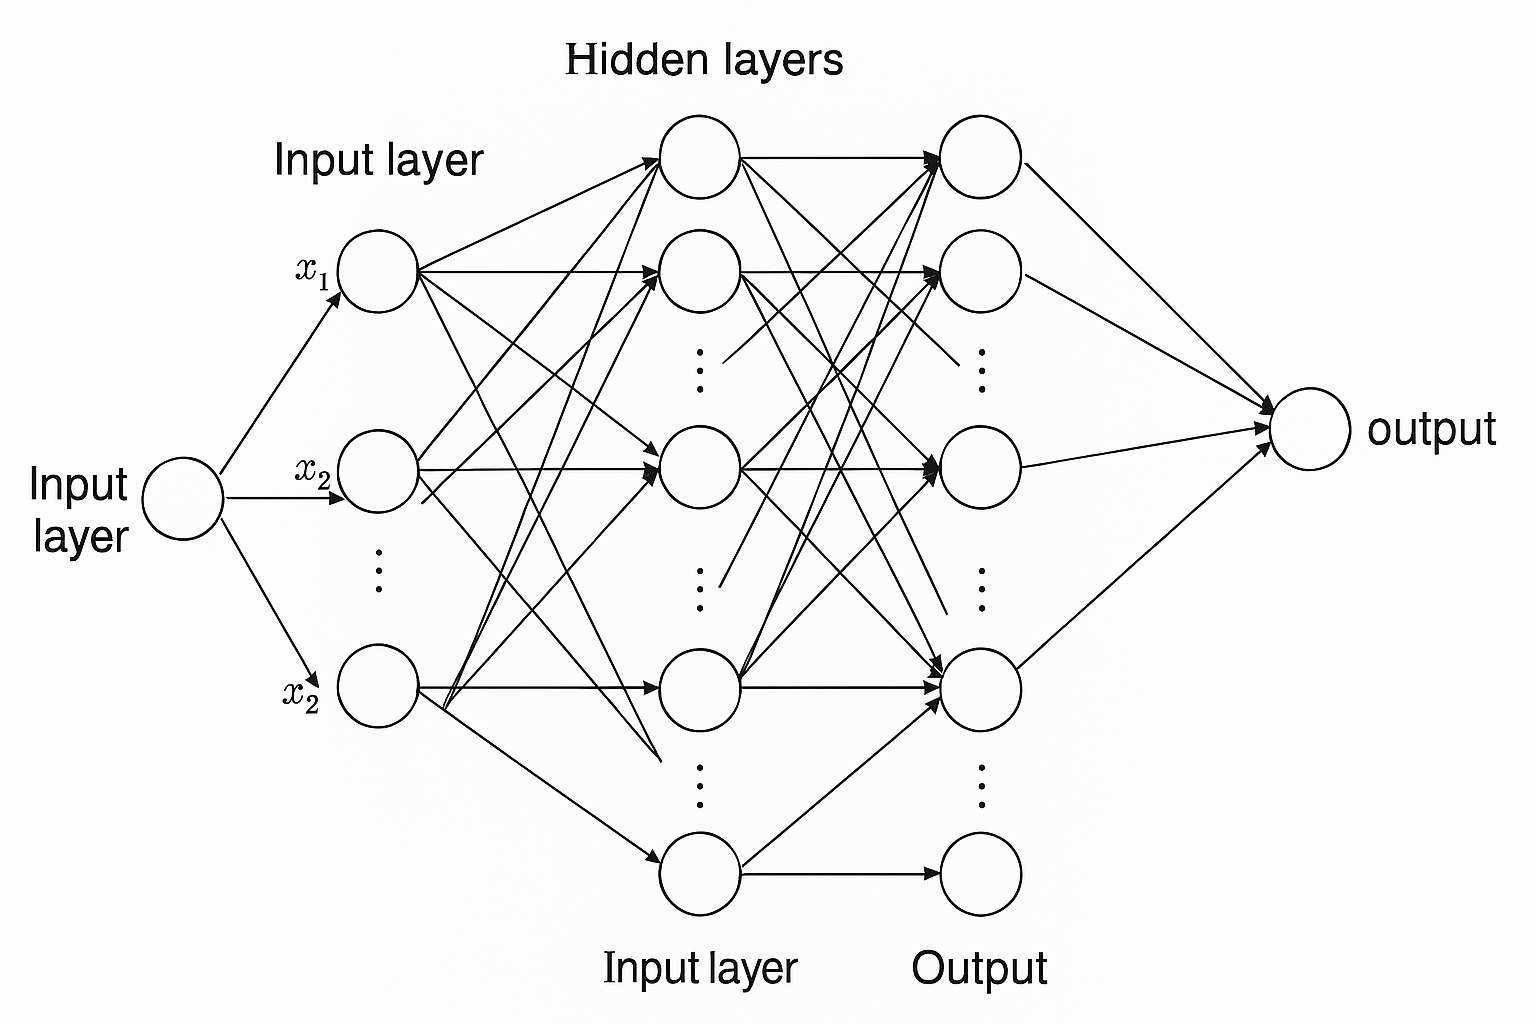

## Making the model make predictions by adding forward pass

Forward Pass: 

Start with input data X.
For each layer:

Compute the weighted sum:
z=X⋅W+b
where:

W = weight matrix
b = bias vector


Apply an activation function (e.g., ReLU, Sigmoid):
a=f(z)
This becomes the input for the next layer.


Repeat until the output layer is reached.
The final result is the prediction of the network.

In [21]:
class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        #implementing the relu activation function
        return np.maximum(0, x)

    def forward(self, X):
        #iterating through all layers
        for W, b in zip(self.weights, self.biases):

            #applying the weight and bias of the layer
            X = np.dot(X, W) + b

            #doing ReLU for all but the last layer
            if W is not self.weights[-1]:
                X = self.relu(X)

        #returning the result
        return X

    def predict(self, X):
        y = self.forward(X)
        return y.flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Generate predictions
prediction = model.predict(np.array([0.1,0.2]))
print(prediction)

[-0.22]


## Problem of vanishing gradiant:
The vanishing gradient problem is a common issue in training deep neural networks, especially those with many layers.

✅ What is it?
When training a neural network using backpropagation, gradients are calculated and propagated backward from the output layer to the input layer. These gradients are used to update weights.
However:

In very deep networks, the gradients often become very small (close to zero) as they move backward through layers.
This happens because of repeated multiplication by small numbers (from derivatives of activation functions like sigmoid or tanh).
As a result, earlier layers learn extremely slowly or not at all.


✅ Why does it happen?

Activation functions like sigmoid and tanh have derivatives between 0 and 1.
When you multiply many small numbers across layers during backpropagation, the gradient shrinks exponentially.
Example:
Gradient≈(0.1)^nfor n layers
For 50 layers, this is practically zero.


✅ Consequences:

Slow training or no learning in early layers.
Network fails to capture important features.


✅ Solutions:

Use ReLU or variants (derivative is 1 for positive inputs, so gradients don’t vanish as easily).
Use better initialization (Xavier, He).
Use Batch Normalization.
Use architectures like ResNet (skip connections).

## ReLU Activation

The ReLU (Rectified Linear Unit) activation function is one of the most widely used functions in neural networks, especially for hidden layers.

✅ What does ReLU do?
Mathematically:
f(x)=max⁡(0,x)

If the input x is positive, ReLU returns x.
If the input x is negative or zero, ReLU returns 0.


✅ Why use ReLU?

Introduces non-linearity: Without it, the network would just be a linear model.
Efficient: Very simple to compute (just a comparison).
Helps avoid vanishing gradients (compared to sigmoid/tanh).
Allows neurons to activate only when needed (sparse activation).

# Training Model
Till now our model is random. Now we need a problem to train it on. 

In the real world we wouldn’t know the underlying function. We can mimic that reality by creating a dataset consisting of random points:

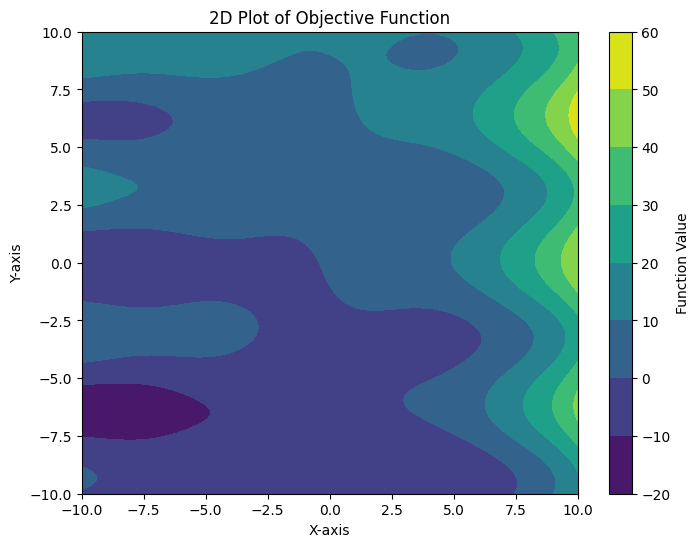

In [22]:
"""Defining what we want the model to learn
"""
import numpy as np
import matplotlib.pyplot as plt

# Define a random function with two inputs
def random_function(x, y):
    return (np.sin(x) + x * np.cos(y) + y + 3**(x/3))

# Generate a grid of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the output of the random function
Z = random_function(X, Y)

# Create a 2D plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(contour, label='Function Value')
plt.title('2D Plot of Objective Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

          X         Y          Z
0  0.803787  9.932076  11.291761
1  2.455605  1.699613   4.475367
2 -9.733559  8.866076  17.451796
3  6.533014 -5.433703  10.067652
4 -8.963829 -6.441422 -15.700530


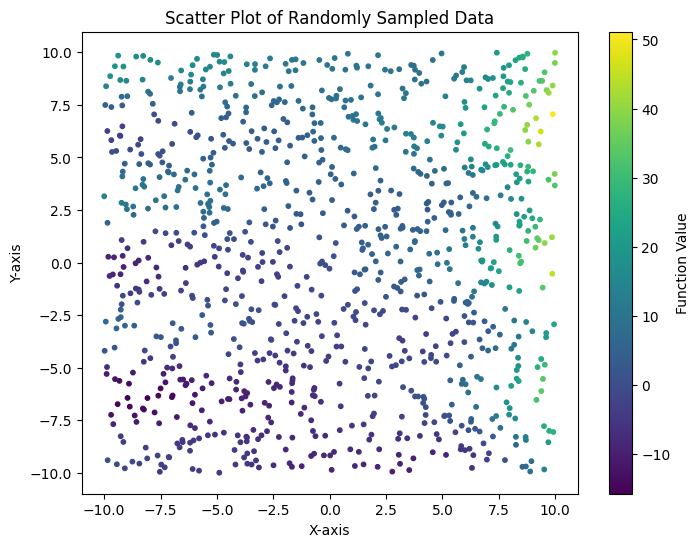

In [23]:

# Define a random function with two inputs
def random_function(x, y):
    return (np.sin(x) + x * np.cos(y) + y + 3**(x/3))

# Define the number of random samples to generate
n_samples = 1000

# Generate random X and Y values within a specified range
x_min, x_max = -10, 10
y_min, y_max = -10, 10

# Generate random values for X and Y
X_random = np.random.uniform(x_min, x_max, n_samples)
Y_random = np.random.uniform(y_min, y_max, n_samples)

# Evaluate the random function at the generated X and Y values
Z_random = random_function(X_random, Y_random)

# Create a dataset
dataset = pd.DataFrame({
    'X': X_random,
    'Y': Y_random,
    'Z': Z_random
})

# Display the dataset
print(dataset.head())

# Create a 2D scatter plot of the sampled data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dataset['X'], dataset['Y'], c=dataset['Z'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Function Value')
plt.title('Scatter Plot of Randomly Sampled Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Before feeding this data into our model, it’s vital that we first "normalize" the data. Certain values of the dataset are very small or very large, which can make training a neural network very difficult. Values within the neural network can quickly grow to absurdly large values, or diminish to zero, which can inhibit training. Normalization squashes all of our inputs, and our desired outputs, into a more reasonable range averaging around zero with a standardized distribution called a "normal" distribution.

In [24]:
# Flatten the data - Normalization
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Stack X and Y as input features
inputs = np.column_stack((X_flat, Y_flat))
outputs = Z_flat

# Normalize the inputs and outputs
inputs_mean = np.mean(inputs, axis=0)
inputs_std = np.std(inputs, axis=0)
outputs_mean = np.mean(outputs)
outputs_std = np.std(outputs)

inputs = (inputs - inputs_mean) / inputs_std
outputs = (outputs - outputs_mean) / outputs_std

# Before we move ahead: 

## ✅ What is Backpropagation?
It’s the process of:

1. Forward Pass: Compute the output of the network for given inputs.
2. Compute Loss: Compare predicted output with actual target using a loss function (e.g., MSE, cross-entropy).
3. Backward Pass:

3.1 Calculate gradients of the loss with respect to each weight and bias using the chain rule of calculus.

3.2 Propagate these gradients backward through the network (from output layer to input layer).

4. Update Parameters:

Adjust weights and biases using an optimization algorithm (e.g., Gradient Descent



✅ Why is it needed?

Neural networks have many layers and millions of parameters.
Backprop efficiently computes all gradients using the chain rule instead of brute force.


✅ Key Steps in Backprop:

1. Compute error at output layer
2. Propagate error backward
3. Compute gradients for weights and biases:

✅ Intuition:

Forward pass: Predict.
Backward pass: Learn from mistakes by adjusting weights in proportion to their contribution to the error.


## Remembering Forward Pass Values
Recall that the back propagation algorithm updates parameters based on what happens in a forward pass. So, before we implement backpropagation itself, let’s keep track of a few important values in the forward pass: The inputs and outputs of each perceptron throughout the model.

In [25]:
class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        #keeping track of these values in this code block
        #so we can observe them
        self.perceptron_inputs = None
        self.perceptron_outputs = None

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    def forward(self, X):
        self.perceptron_inputs = [X]
        self.perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(self.perceptron_inputs[-1], W) + b
            self.perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            self.perceptron_inputs.append(A)

        return self.perceptron_inputs, self.perceptron_outputs

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Generate predictions
prediction = model.predict(np.array([0.1,0.2]))

#looking through critical optimization values
for i, (inpt, outpt) in enumerate(zip(model.perceptron_inputs, model.perceptron_outputs[:-1])):
    print(f'layer {i}')
    print(f'input: {inpt.shape}')
    print(f'output: {outpt.shape}')
    print('')

print('Final Output:')
print(model.perceptron_outputs[-1].shape)

layer 0
input: (2,)
output: (1, 64)

layer 1
input: (1, 64)
output: (1, 64)

layer 2
input: (1, 64)
output: (1, 64)

Final Output:
(1, 1)


# Code Explanation: 
#### 1) Tracking attributes added to the class
self.perceptron_inputs = None
self.perceptron_outputs = None

These will later hold lists populated during the forward pass:

perceptron_inputs: stores A values (activated outputs) entering each layer, including the raw input X at index 0.

perceptron_outputs: stores the Z values (pre-activation linear outputs) for each layer.



#### 2) Parameter initialization (weights and biases)
np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))


Fixes random seed for reproducible initialization.
For every adjacent layer pair (n_in → n_out):

W shape: (n_in, n_out)
b shape: (1, n_out)


With architecture [2, 64, 64, 64, 1], you get 4 weight matrices and 4 bias vectors:

(2,64), (64,64), (64,64), (64,1) and biases (1,64), (1,64), (1,64), (1,1).



#### 3) Activation function:
Implements ReLU: passes positive inputs through, zeros-out negative ones.

#### 4) Forward pass with bookkeeping
def forward(self, X)

Initializes tracking lists:

perceptron_inputs[0] = X (the original input).
perceptron_outputs = [] (will fill with each layer’s Z).



        for W, b in zip(self.weights, self.biases):
            Z = np.dot(self.perceptron_inputs[-1], W) + b
            self.perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            self.perceptron_inputs.append(A)

For each layer:

- Computes the linear transform: Z=Aprev⋅W+b

- Appends the Z to perceptron_outputs.


Shapes (assuming X is (batch_size, 2)):

A_prev: (batch_size, n_in)
W: (n_in, n_out)
b: (1, n_out) (broadcast over rows)
Z: (batch_size, n_out)



- If it’s not the last layer, apply ReLU to get the activation AAA.
- For the final layer, keep it linear (typical for regression tasks).
(For classification, you might use sigmoid/softmax.)
  Appends the activation A to perceptron_inputs; this becomes A_prev for the next layer.

return self.perceptron_inputs, self.perceptronShow more lines

Returns the full lists:

perceptron_inputs: [X, A^1, A^2, A^3, A^4]
perceptron_outputs: [Z^1, Z^2, Z^3, Z^4]



#### 5) Precitor:

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()


Runs the forward pass and returns the final activation (A of the last layer).
flatten() turns the output into a 1D array (useful for printing and loss functions).

#### 6) Construct model and run a sample
architecture = [2, 64, 64, 64, 1]

model = SimpleNN(architecture)

prediction = model.predict(np.array([0.1, 0.2]))


#### 7) Inspect intermediate shapes (super helpful!)
Prints the shape of A_prev going into each layer and the corresponding Z out of that layer.
For [2, 64, 64, 64, 1] and a single input:

Input to layer 0: (1, 2)
Z^1: (1, 64)
Input to layer 1: (1, 64)
Z^2: (1, 64)
Input to layer 2: (1, 64)
Z^3: (1, 64)
Final Output Z^4: (1, 1)

Now that we have a record stored of critical intermediary value within the network, we can use those values, along with the error of a model for a particular prediction, to calculate the changes we should make to the model.  

In [26]:
import numpy as np

class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_as_weights(x):
        return (x > 0).astype(float)

    def forward(self, X):
        perceptron_inputs = [X]
        perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(perceptron_inputs[-1], W) + b
            perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            perceptron_inputs.append(A)

        return perceptron_inputs, perceptron_outputs

    def backward(self, perceptron_inputs, perceptron_outputs, target):
        weight_changes = []
        bias_changes = []

        m = len(target)
        dA = perceptron_inputs[-1] - target.reshape(-1, 1)  # Output layer gradient

        for i in reversed(range(len(self.weights))):
            dZ = dA if i == len(self.weights) - 1 else dA * self.relu_as_weights(perceptron_outputs[i])
            dW = np.dot(perceptron_inputs[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
            weight_changes.append(dW)
            bias_changes.append(db)

            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)

        return list(reversed(weight_changes)), list(reversed(bias_changes))

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()

#defining a model
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

#defining a sample input and target output
input = np.array([[0.1,0.2]])
desired_output = np.array([0.5])

#doing forward and backward pass to calculate changes
perceptron_inputs, perceptron_outputs = model.forward(input)
weight_changes, bias_changes = model.backward(perceptron_inputs, perceptron_outputs, desired_output)

#smaller numbers for printing
np.set_printoptions(precision=2)

for i, (layer_weights, layer_biases, layer_weight_changes, layer_bias_changes) in enumerate(zip(model.weights, model.biases, weight_changes, bias_changes)):
    print(f'layer {i}')
    print(f'weight matrix: {layer_weights.shape}')
    print(f'weight matrix changes: {layer_weight_changes.shape}')
    print(f'bias matrix: {layer_biases.shape}')
    print(f'bias matrix changes: {layer_bias_changes.shape}')
    print('')

print('The weight and weight change matrix of the second layer:')
print('weight matrix:')
print(model.weights[1])
print('change matrix:')
print(weight_changes[1])


layer 0
weight matrix: (2, 64)
weight matrix changes: (2, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 1
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 2
weight matrix: (64, 64)
weight matrix changes: (64, 64)
bias matrix: (1, 64)
bias matrix changes: (1, 64)

layer 3
weight matrix: (64, 1)
weight matrix changes: (64, 1)
bias matrix: (1, 1)
bias matrix changes: (1, 1)

The weight and weight change matrix of the second layer:
weight matrix:
[[ 0.41 -0.2   0.24 ... -0.77 -0.7   0.22]
 [ 0.69 -0.13 -0.07 ...  0.95 -0.77 -0.18]
 [ 0.57  0.23  0.41 ...  0.4  -0.45 -0.85]
 ...
 [-0.7  -0.07 -0.31 ... -0.68 -0.01  0.5 ]
 [-0.73 -0.95  0.67 ... -0.32  0.85  0.05]
 [ 0.8   0.24  0.33 ...  0.77 -0.67 -0.77]]
change matrix:
[[ 0.    0.    0.   ...  0.05  0.   -0.07]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.03  0.   -0.04]
 [ 0.    0.    0. 

This is probably the most complex implementation step, so I want to take a moment to dig through some of the details. The fundamental idea is exactly as we described in previous sections. We’re iterating over all layers, from back to front, and calculating what change to each weight and bias would result in a better output.

# 🧩 Step-by-step explanation with shapes
#### 1) relu_as_weights(x)
def relu_as_weights(x)

This is a simple way to compute ReLU derivative:

-- If Z>0, derivative = 1

-- Else, derivative = 0


It returns a mask with 1.0 where Z is positive and 0.0 otherwise.

#### 2) forward(self, X) (returns values needed for backprop)

Shapes (for batch_size=1 with [2,64,64,64,1]):

A^0 (input): (1, 2)
Z^1: (1, 64) → A^1: (1, 64)
Z^2: (1, 64) → A^2: (1, 64)
Z^3: (1, 64) → A^3: (1, 64)
Z^4: (1, 1) → A^4: (1, 1) (linear for regression)



#### 3) backward(self, ...)

weight_changes = []

bias_changes = []

m = len(target)  # batch size

dA = perceptron_inputs

m is the batch size (number of samples).

perceptron_inputs[-1] is the final activation A^L (shape: (m, 1)).

target.reshape(-1, 1) converts target to shape (m, 1).

For MSE-like gradient on linear output, dA=y^−y

for i in reversed(range(len(self.weights))):    
dZ = dA if i == len(self.weights) - 1 
else dA * self.relu_as_weights(perceptron_outputs[i])

- Iterate backwards from the last layer L-1 to 0.
- Convert activation gradient to pre-activation gradient:

- For the last layer (linear output for regression):dZ=dA
- For hidden layers with ReLU: dZ=dA⊙f′(Z)



dW = np.dot(perceptron_inputs[i].T, dZ) / m    db = np.sum(dZ, axis=0, keepdims=True) / mShow more lines

Weight gradient and Bias gradeent calculated:


weight_changes.append(dW)    
bias_changes.append(db)

Store the per-layer gradients, in reverse order (since we’re iterating backwards).

Backpropagate the gradient to the previous layer’s activation:


Gradients were collected from last to first; reverse them so they align with the model’s layers from first to last (same index ordering as self.weights / self.biases).

#### 4) Example usage (forward + backward)
input = np.array([[0.1, 0.2]])      # shape: (1, 2)
desired_output = np.array([0.5])    # shape: (1,)perceptron_inputs

Runs one forward pass to fill A/Z lists.
Runs backward to compute dW and db for all layers relative to the provided target.

5) Inspecting shapes of gradients (sanity check)

Confirms that gradients match parameter shapes:

For [2,64,64,64,1]:

Layer 0: W (2,64) → dW (2,64), b (1,64) → db (1,64)
Layer 1: W (64,64) → dW (64,64), b (1,64) → db (1,64)
Layer 2: W (64,64) → dW (64,64), b (1,64) → db (1,64)
Layer 3: W (64,1)  → dW (64,1),  b (1,1)  → db (1,1)




# Implement Training

The train function:

iterates through all the data some number of times (defined by epoch )
passes the data through a forward pass
calculates how the weights and biases should change
updates the weights and biases, by scaling their changes by the learning rate ( lr )
And thus we’ve implemented a neural network! Let’s train it.

In [27]:
class SimpleNN:
    def __init__(self, architecture):
        self.architecture = architecture
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        np.random.seed(99)
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.uniform(
                low=-1, high=1,
                size=(architecture[i], architecture[i+1])
            ))
            self.biases.append(np.zeros((1, architecture[i+1])))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_as_weights(x):
        return (x > 0).astype(float)

    def forward(self, X):
        perceptron_inputs = [X]
        perceptron_outputs = []

        for W, b in zip(self.weights, self.biases):
            Z = np.dot(perceptron_inputs[-1], W) + b
            perceptron_outputs.append(Z)

            if W is self.weights[-1]:  # Last layer (output)
                A = Z  # Linear output for regression
            else:
                A = self.relu(Z)
            perceptron_inputs.append(A)

        return perceptron_inputs, perceptron_outputs

    def backward(self, perceptron_inputs, perceptron_outputs, y_true):
        weight_changes = []
        bias_changes = []

        m = len(y_true)
        dA = perceptron_inputs[-1] - y_true.reshape(-1, 1)  # Output layer gradient

        for i in reversed(range(len(self.weights))):
            dZ = dA if i == len(self.weights) - 1 else dA * self.relu_as_weights(perceptron_outputs[i])
            dW = np.dot(perceptron_inputs[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
            weight_changes.append(dW)
            bias_changes.append(db)

            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)

        return list(reversed(weight_changes)), list(reversed(bias_changes))

    def update_weights(self, weight_changes, bias_changes, lr):
        for i in range(len(self.weights)):
            self.weights[i] -= lr * weight_changes[i]
            self.biases[i] -= lr * bias_changes[i]

    def train(self, X, y, epochs, lr=0.01):
        for epoch in range(epochs):
            perceptron_inputs, perceptron_outputs = self.forward(X)
            weight_changes, bias_changes = self.backward(perceptron_inputs, perceptron_outputs, y)
            self.update_weights(weight_changes, bias_changes, lr)

            if epoch % 20 == 0 or epoch == epochs - 1:
                loss = np.mean((perceptron_inputs[-1].flatten() - y) ** 2)  # MSE
                print(f"EPOCH {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        perceptron_inputs, _ = self.forward(X)
        return perceptron_inputs[-1].flatten()

Once we’ve done that, we can define and train our model.

# Epoch

An epoch means one complete pass through the entire training dataset.
If you have 10,000 samples and you train for 5 epochs, the model will see all 10,000 samples five times.
Why multiple epochs?

Neural networks usually need many passes over the data to learn patterns.
Each epoch updates weights based on the current error, gradually improving performance.



Example:

Dataset size = 1,000 samples
Batch size = 100
One epoch = 10 batches (because 1,000 ÷ 100 = 10)
If you train for 20 epochs, the network processes 10 × 20 = 200 batches total.

# Learning Rate

✅ Learning Rate (η)

The learning rate controls how big a step the optimizer takes when updating weights during training.
Formula for weight update:
Wnew=Wold−η⋅(Delta L / Delta W)

Where:

η = learning rate
dL/dW = gradient of the loss with respect to weights



Why is it important?

Too high → model overshoots, fails to converge (loss jumps around).
Too low → model learns very slowly, may get stuck in local minima.

Typical values:

Start with 0.001 or 0.01 for many optimizers.
Sometimes use learning rate schedules (reduce over time) or adaptive methods (Adam, RMSProp).

In [28]:
# Define the architecture: [input_dim, hidden1, ..., output_dim]
architecture = [2, 64, 64, 64, 1]  # Two inputs, two hidden layers, one output
model = SimpleNN(architecture)

# Train the model
model.train(inputs, outputs, epochs=1000, lr=0.001)

EPOCH 0: Loss = 166.5157
EPOCH 20: Loss = 2.5053
EPOCH 20: Loss = 2.5053
EPOCH 40: Loss = 1.1687
EPOCH 40: Loss = 1.1687
EPOCH 60: Loss = 0.8406
EPOCH 60: Loss = 0.8406
EPOCH 80: Loss = 0.6814
EPOCH 80: Loss = 0.6814
EPOCH 100: Loss = 0.5828
EPOCH 100: Loss = 0.5828
EPOCH 120: Loss = 0.5140
EPOCH 120: Loss = 0.5140
EPOCH 140: Loss = 0.4636
EPOCH 140: Loss = 0.4636
EPOCH 160: Loss = 0.4257
EPOCH 160: Loss = 0.4257
EPOCH 180: Loss = 0.3959
EPOCH 180: Loss = 0.3959
EPOCH 200: Loss = 0.3719
EPOCH 200: Loss = 0.3719
EPOCH 220: Loss = 0.3521
EPOCH 220: Loss = 0.3521
EPOCH 240: Loss = 0.3351
EPOCH 240: Loss = 0.3351
EPOCH 260: Loss = 0.3203
EPOCH 260: Loss = 0.3203
EPOCH 280: Loss = 0.3071
EPOCH 280: Loss = 0.3071
EPOCH 300: Loss = 0.2952
EPOCH 300: Loss = 0.2952
EPOCH 320: Loss = 0.2844
EPOCH 320: Loss = 0.2844
EPOCH 340: Loss = 0.2745
EPOCH 340: Loss = 0.2745
EPOCH 360: Loss = 0.2653
EPOCH 360: Loss = 0.2653
EPOCH 380: Loss = 0.2568
EPOCH 380: Loss = 0.2568
EPOCH 400: Loss = 0.2489
EPOCH 40

# Visualization
Then we can visualize the output of the neural network’s prediction vs the actual function.

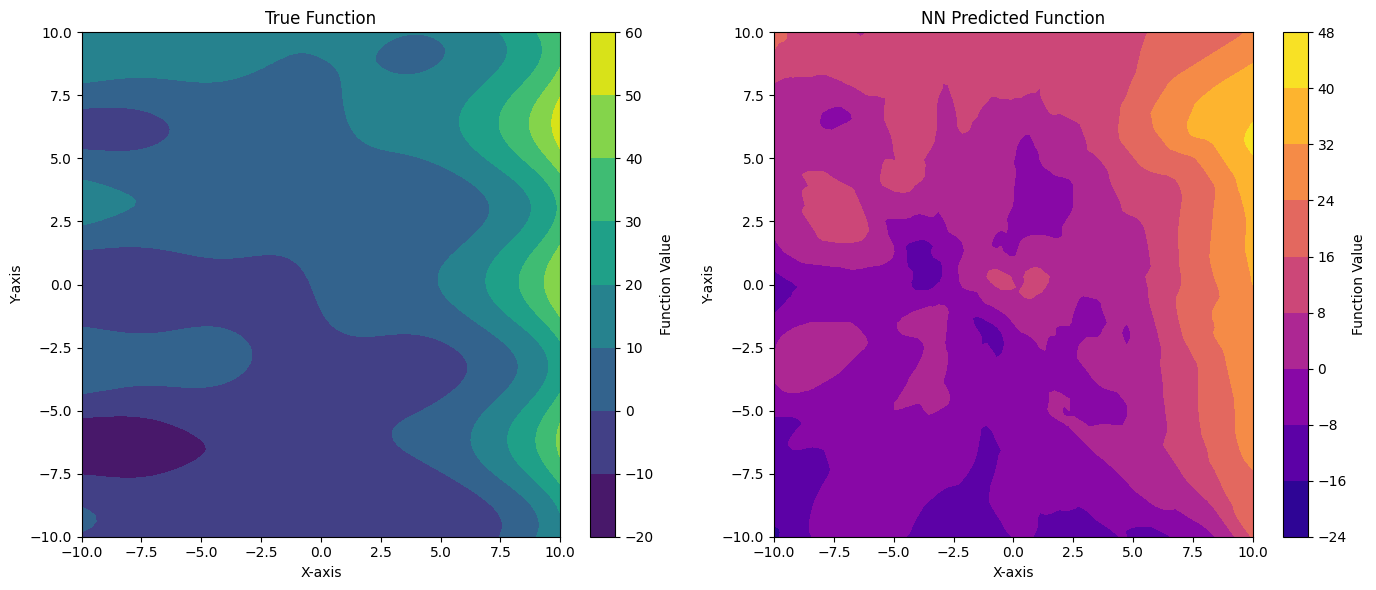

In [29]:
import matplotlib.pyplot as plt
# Reshape predictions to grid format for visualization
Z_pred = model.predict(inputs) * outputs_std + outputs_mean
Z_pred = Z_pred.reshape(X.shape)

# Plot comparison of the true function and the model predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the true function
contour1 = axes[0].contourf(X, Y, Z, cmap='viridis')
axes[0].set_title("True Function")
axes[0].set_xlabel("X-axis")
axes[0].set_ylabel("Y-axis")
plt.colorbar(contour1, ax=axes[0], label="Function Value")

# Plot the predicted function
contour2 = axes[1].contourf(X, Y, Z_pred, cmap='plasma')
axes[1].set_title("NN Predicted Function")
axes[1].set_xlabel("X-axis")
axes[1].set_ylabel("Y-axis")
plt.colorbar(contour2, ax=axes[1], label="Function Value")

plt.tight_layout()
plt.show()